## Deliverable #2 - Interim Work in Jupyter Notebook

The interim deliverable allows the instructor to review your preliminary work and provide feedback. 

You will perform the loading, examination, and processing of the data using Pandas.

You will perform descriptive analytics. Display number of observations (rows), variables (columns),  summary statistics.

You may produce some simple plots. This will help you get a feel of your data and inform your next step of analysis.

You should submit a Jupyter Notebook with well-formatted documentation (in MArkdown cells) and Python comments (in code cells), Python code, and output (plots, charts).

The project proposal will no longer be needed. All of part of its content should be incorporated in the Jupyter notebook.

Special instructions:

1. Please format the Jupyter Notebook file neatly and nicely for readability. Treat it as a research paper and a project in your portfolio.
2. The file must be self-explanatory and can stand alone so the readers understand the project without having to read other documents or ask you for clarification.
3. Use markdown cell for large block of texts such as background, data sources, list of elements and their meanings. 
4. In a code cell, use comments above a line of code or to the right of a line of code to annotate/comment the code only necessary.
5. Limit the length of outputs. For example, don't output more data than necessary. Use head/tail/sample on dataframe to limit the number of rows displayed (5 or 10 is good); 
6. Structure your notebook with headings including sequence numbers and section titles similar to a paper. Also use bold, italic, bulletted list, etc.
7. Don't do complicated techniques or too many techniques, keep it simple and focus on the clarity of concepts and the style of communications. 
8. This is a proof-of-concept deliverable which helps you practice data science. You are graded both on the substance and the style. 
9. On the substance: focus on data preparation and data visualization (make sure the plots are large enough). Statistical inference is optional.  
10. Don't boil the ocean. The issue you are looking into may be large, but you will only focus on one aspect of it and not try to solve the big problem. A couple of research questions would suffice. Don't try to answer too many questions.

## Libraries Used

In [104]:
from os import listdir
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from tqdm import tqdm

In [171]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### The data "Early Prediction of Sepsis from Clinical Data -- the PhysioNet Computing in Cardiology Challenge 2019" is legally download from https://physionet.org/content/challenge-2019/1.0.0/, Columns in each training data file.
###### Vital signs (columns 1-8)
HR	Heart rate (beats per minute)
O2Sat	Pulse oximetry (%)
Temp	Temperature (Deg C)
SBP	Systolic BP (mm Hg)
MAP	Mean arterial pressure (mm Hg)
DBP	Diastolic BP (mm Hg)
Resp	Respiration rate (breaths per minute)
EtCO2	End tidal carbon dioxide (mm Hg)
###### Laboratory values (columns 9-34)
BaseExcess	Measure of excess bicarbonate (mmol/L)
HCO3	Bicarbonate (mmol/L)
FiO2	Fraction of inspired oxygen (%)
pH	N/A
PaCO2	Partial pressure of carbon dioxide from arterial blood (mm Hg)
SaO2	Oxygen saturation from arterial blood (%)
AST	Aspartate transaminase (IU/L)
BUN	Blood urea nitrogen (mg/dL)
Alkalinephos	Alkaline phosphatase (IU/L)
Calcium	(mg/dL)
Chloride	(mmol/L)
Creatinine	(mg/dL)
Bilirubin_direct	Bilirubin direct (mg/dL)
Glucose	Serum glucose (mg/dL)
Lactate	Lactic acid (mg/dL)
Magnesium	(mmol/dL)
Phosphate	(mg/dL)
Potassium	(mmol/L)
Bilirubin_total	Total bilirubin (mg/dL)
TroponinI	Troponin I (ng/mL)
Hct	Hematocrit (%)
Hgb	Hemoglobin (g/dL)
PTT	partial thromboplastin time (seconds)
WBC	Leukocyte count (count*10^3/µL)
Fibrinogen	(mg/dL)
Platelets	(count*10^3/µL)
Demographics (columns 35-40)
Age	Years (100 for patients 90 or above)
Gender	Female (0) or Male (1)
Unit1	Administrative identifier for ICU unit (MICU)
Unit2	Administrative identifier for ICU unit (SICU)
HospAdmTime	Hours between hospital admit and ICU admit
ICULOS	ICU length-of-stay (hours since ICU admit)
###### Outcome (column 41)
SepsisLabel	For sepsis patients, SepsisLabel is 1 if t≥tsepsis−6 and 0 if t<tsepsis−6. For non-sepsis patients, SepsisLabel is 0.

## Unzip Files

In [ ]:
!unzip training_setA.zip

!unzip training_setB.zip

## 1. Combine all the patients' data into one DataFrame.

In [9]:
# With the help of the link:https://github.com/jambo6/sepsis_competition_physionet_2019.
a_traincsv = listdir('training/')
b_traincsv = listdir('training_setB/')



with open('patient10102020.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')


  for ind, csv_name in enumerate(a_traincsv):
    with open('training/'+ csv_name,'r') as csvinput:

    
      reader = csv.reader(csvinput, delimiter='|')
      all = []
      
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        row.append('time')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        row.append(i)
        
        
        all.append(row)

      writer.writerows(all)
 

  num = ind 


  for inde, csv_name in enumerate(b_traincsv):
    #if inde < 10000:
      num = num+1
      with open('training_setB/'+ csv_name,'r') as csvinput:


        reader = csv.reader(csvinput, delimiter='|')
        all = []


        row = next(reader)
        for i,row in enumerate(reader):
          row.append(num)
          row.append(i)


          all.append(row)

        writer.writerows(all)


In [ ]:
with open('patient10102020.csv', 'w') as csvoutput:  # create a blank csv and append all content to the .csv.
  writer = csv.writer(csvoutput, lineterminator='\n')


  for ind, csv_name in enumerate(a_traincsv):
    with open('training/'+ csv_name,'r') as csvinput:

    
      reader = csv.reader(csvinput, delimiter='|')
      all = []
      
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        row.append('time')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        row.append(i)
        all.append(row)
      writer.writerows(all)

In [170]:
!ls  # Check the files list.

Data690_01_Project .ipynb
Data_Preprocessing_Temporal.ipynb
EDA_Temporal.ipynb
Early_Prediction_of_Sepsis_From_Clinical_Data__The.10.pdf
Interim Project 690-01.ipynb
interim Project 690-01-Copy1.ipynb
patient10102020.csv
physionet_challenge_2019_ccm_manuscript.pdf
test_patient.csv
train_patient.csv
training
training_setA.zip
training_setB
training_setB.zip
val_patient.csv


## 2. Read in the DataFrame and Check its basic information

In [3]:
df = pd.read_csv('patient10102020.csv') # Rename the csv file to df which is easier.
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4


In [4]:
df.columns # check the column names.

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id', 'time'],
      dtype='object')

In [5]:
df.isnull().sum() # check the sum of null value.

HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Age                       0
Gender              

In [6]:
df.shape # Check the data size.

(1552210, 43)

In [7]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
count,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,65028.000000,...,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,24.075481,...,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,2.006677e+04,2.549274e+01
std,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,4.376504,...,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,1.164922e+04,2.888256e+01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,0.000000,...,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,22.000000,...,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.964000e+03,9.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,24.000000,...,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.998300e+04,1.900000e+01
75%,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,26.800000,...,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,3.017500e+04,3.300000e+01
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,55.000000,...,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,4.033500e+04,3.350000e+02


In [21]:
df['Patient_id'].unique() # Get the unique Patient_id.

array([    0,     1,     2, ..., 40333, 40334, 40335])

In [10]:
df['Patient_id'].unique().shape # Get the number of the patient.

(40336,)

In [13]:
df['SepsisLabel'].unique() # check the SepsisLabel category.

array([0, 1])

In [14]:
df['time'].unique() #Check how many hours in the 'time' column.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [15]:
df.groupby('SepsisLabel')['Age'].mean() # try to get the average age for each sepsisLabel.

SepsisLabel
0    62.009045
1    62.032591
Name: Age, dtype: float64

## 3. Exploratory Data Analysis

### 3.1 Check the feature difference between the patients with and without sepsis.

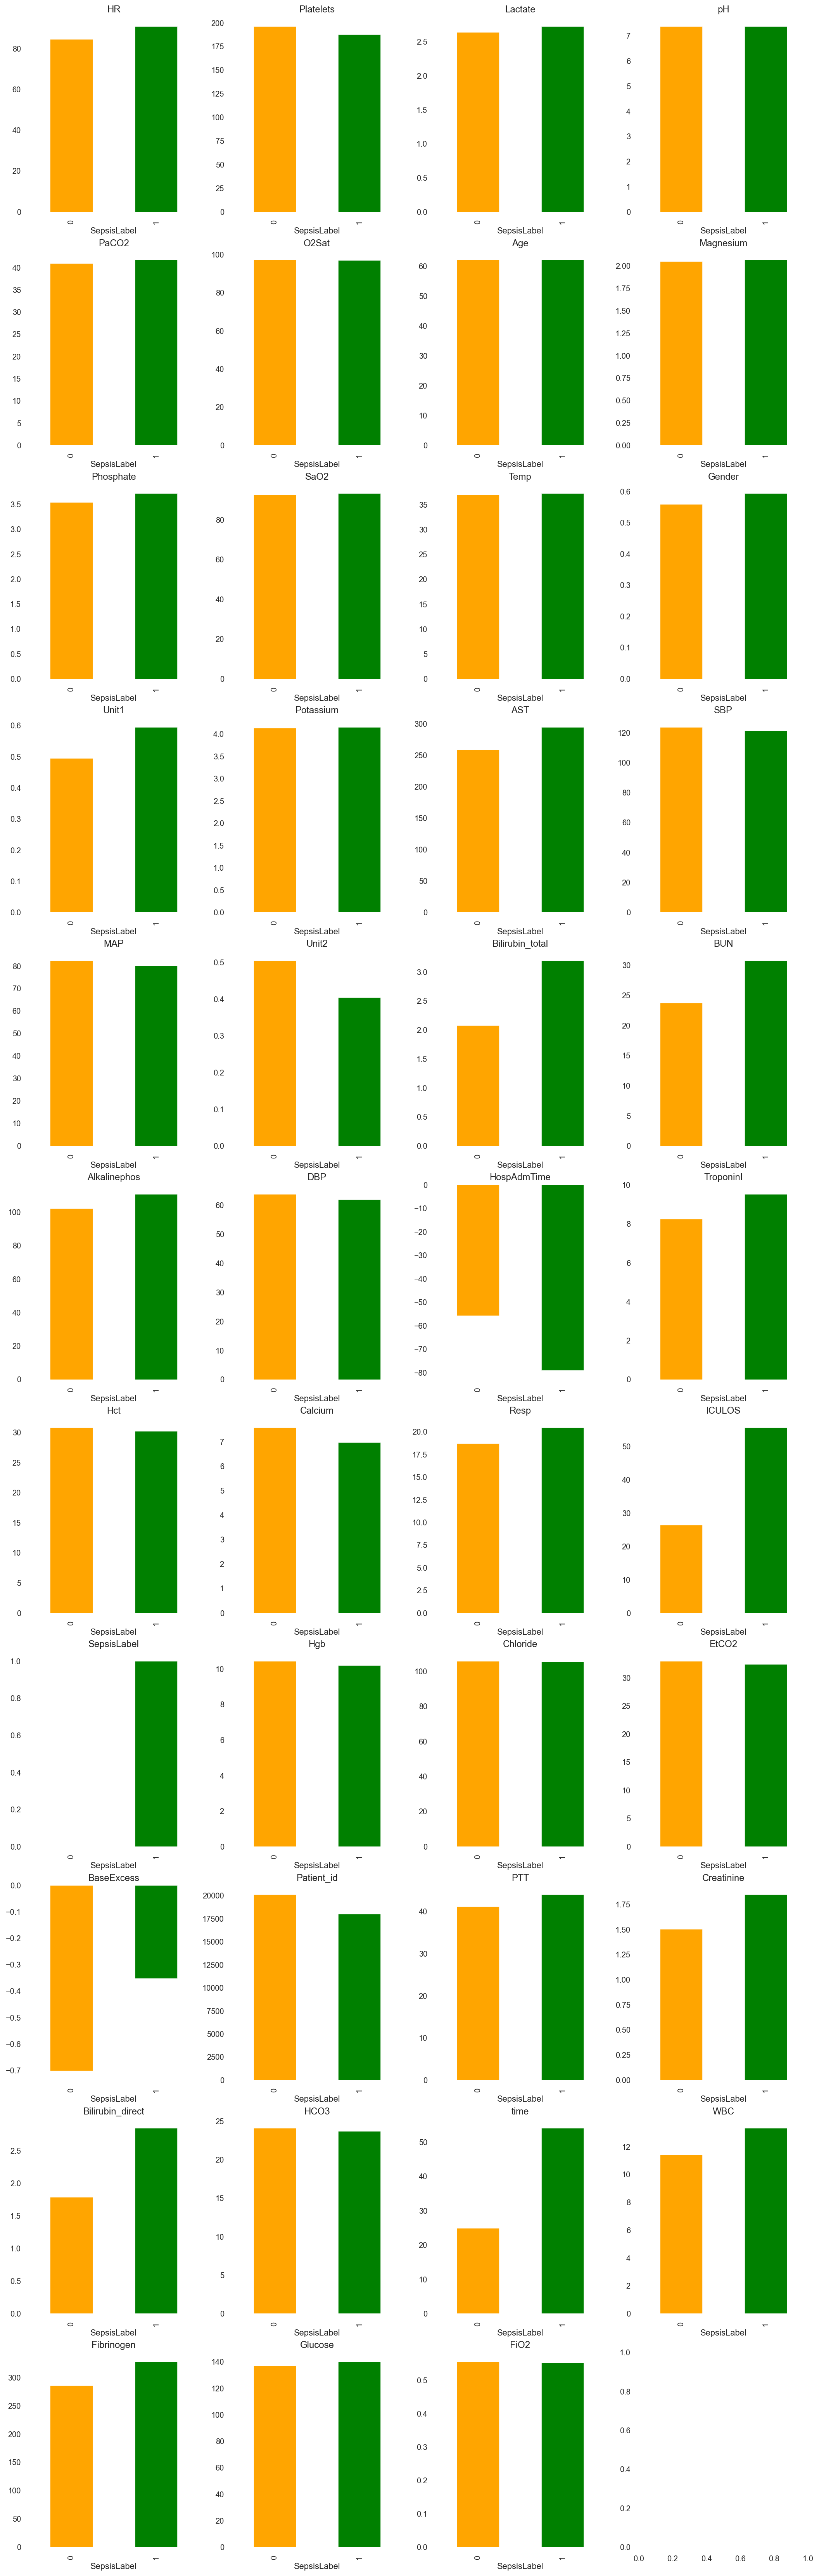

In [175]:
# The subplot is easy for this dataset which has so many columns, groupby the 'SepsisLabel' column.
fig, axes = plt.subplots(11, 4, figsize=(18,60))
for index, column in enumerate(df.columns):
    df.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%11, index%4], color=['orange', 'green'])
   

### 3.2 Check the feature difference between male and female.

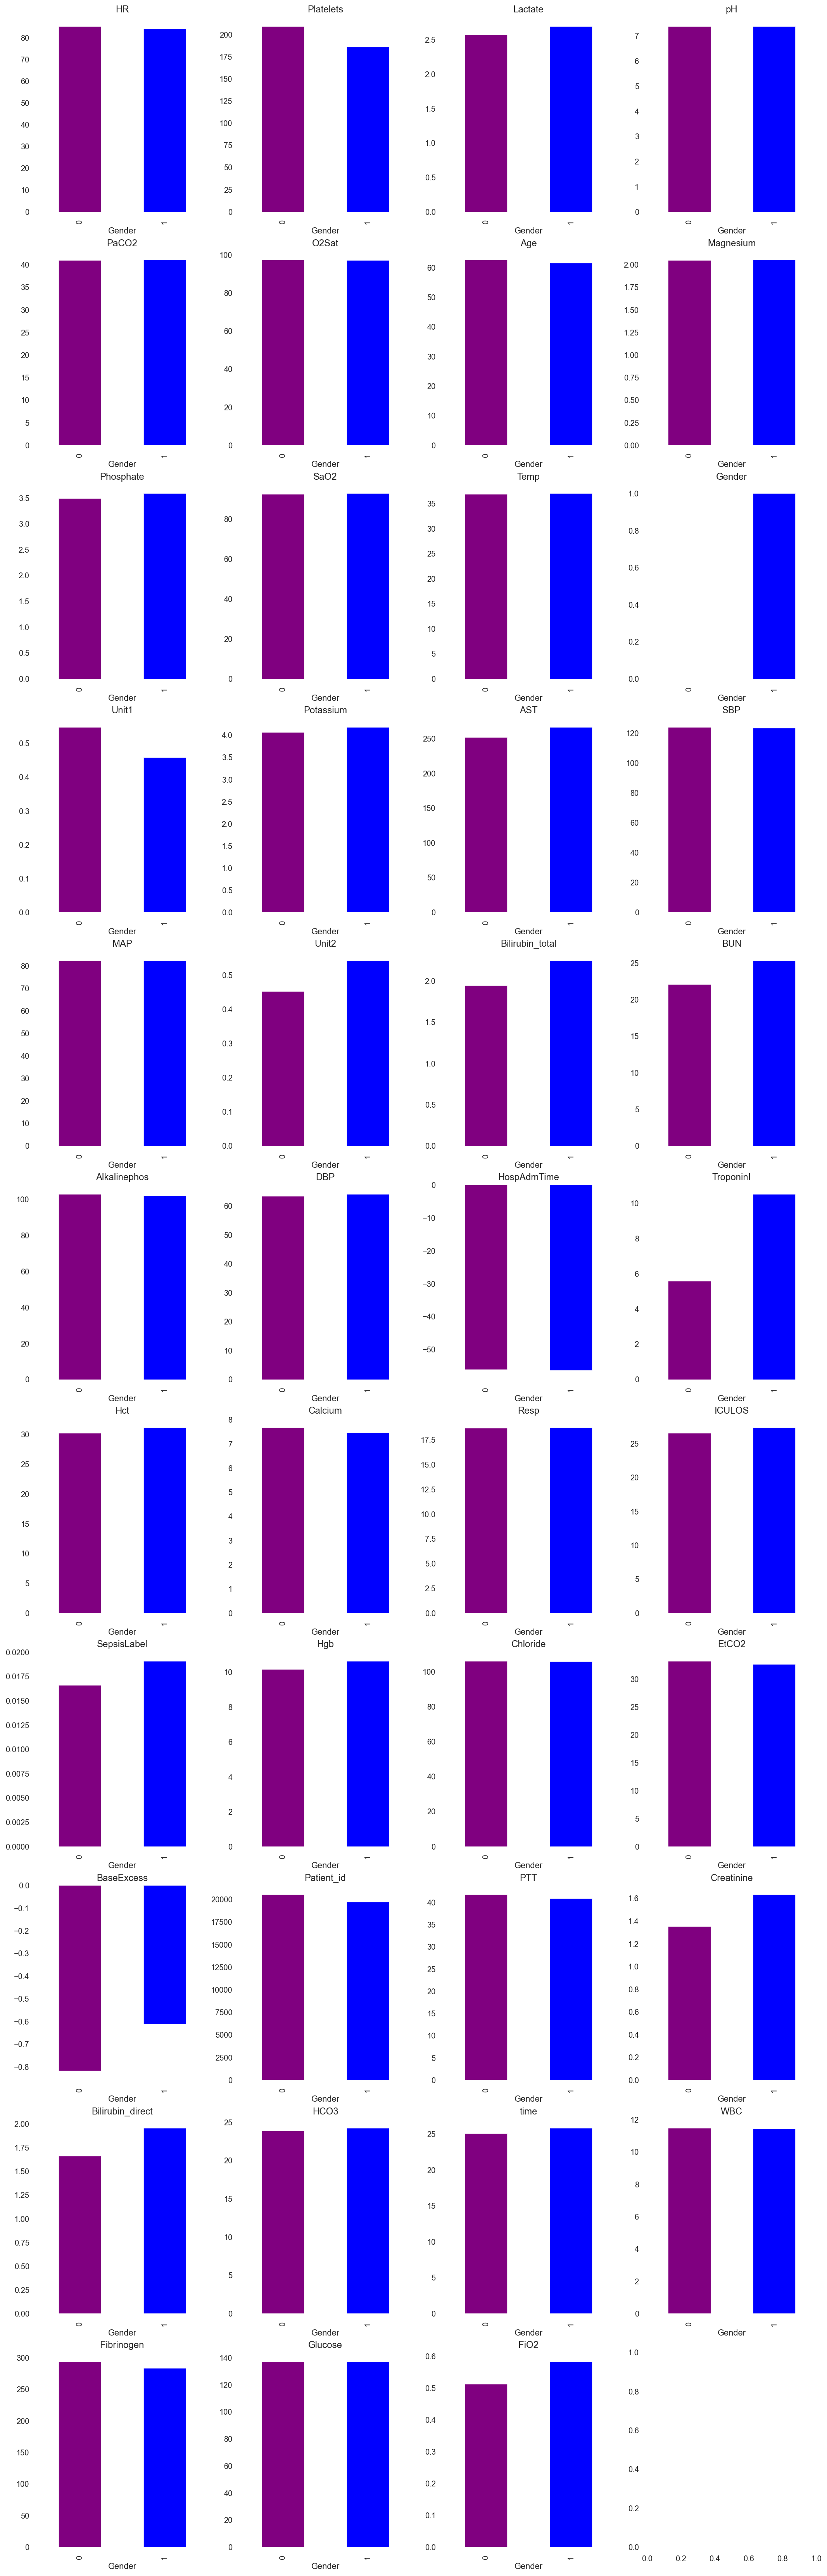

In [176]:
# groupby the 'Gender' column.
fig, axes = plt.subplots(11, 4, figsize=(18,60))
for index, column in enumerate(df.columns):
    df.groupby('Gender')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%11, index%4], color=['purple', 'blue'])

In [35]:
len(df[df['SepsisLabel']==0]['Patient_id'].unique())

39910

In [36]:
Number_of_Female_in_ICU = len(df[df['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_ICU

17770

In [37]:
Number_of_Male_in_ICU = len(df[df['SepsisLabel']==0]['Patient_id'].unique())- Number_of_Female_in_ICU
Number_of_Male_in_ICU

22140

In [43]:
Male_Female_in_ICU_ratio = Number_of_Male_in_ICU/Number_of_Female_in_ICU
Male_Female_in_ICU_ratio

1.2459200900393923

### 3.3 Select the patients with sepsis during hospital stay

In [134]:
patient_id_sepsis = df[df['SepsisLabel']==1]['Patient_id'].unique() #Get the unique Patient_id.

In [135]:
len(patient_id_sepsis)

2932

In [136]:
df_sepsis = df[df['Patient_id'].isin(patient_id_sepsis)]
df_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
238,110.0,100.0,35.90,110.0,83.0,70.0,14.0,NaN,-4.0,20.0,...,NaN,66.36,1,0.0,1.0,-162.76,6,0,6,0
239,110.0,100.0,36.20,118.0,90.0,76.0,14.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,7,0,6,1
240,102.0,100.0,36.50,100.0,76.0,63.0,14.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,8,0,6,2
241,101.0,100.0,36.10,121.0,87.0,71.0,15.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,9,0,6,3
242,100.0,100.0,36.00,129.0,90.0,72.0,16.0,NaN,NaN,21.0,...,105.0,66.36,1,0.0,1.0,-162.76,10,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551484,87.5,100.0,37.35,146.0,101.5,72.5,14.5,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,6,1,40323,5
1551485,74.0,100.0,37.20,140.0,98.0,69.0,14.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,7,1,40323,6
1551486,85.0,97.0,NaN,147.0,100.0,70.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,8,1,40323,7
1551487,78.0,99.0,NaN,157.0,110.0,77.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,9,1,40323,8


### 3.3.1 Check the number of women and men in sepsis group.

In [150]:
Number_of_Female_in_sepsis = len(df_sepsis[df_sepsis['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_sepsis

1193

In [151]:
Number_of_Male_in_sepsis = (len(patient_id_sepsis)) - Number_of_Female_in_sepsis
Number_of_Male_in_sepsis

1739

In [152]:
Male_Female_in_sepsis_ratio = Number_of_Male_in_sepsis/Number_of_Female_in_sepsis
Male_Female_in_sepsis_ratio

1.4576697401508802

### In sepsis group, the ratio of the male to female is 1.458.

In [141]:
len(Age_list_sepsis)

2932

### 3.3.2 The average age for the sepsis group is 66.36.

In [140]:
Age_list_sepsis = df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis)][df_sepsis['time']==0]['Age']
Age_list_sepsis

238        66.36
2055       60.42
2160       82.79
2421       45.98
2816       80.26
           ...  
1549337    87.00
1550041    57.00
1550461    72.00
1551431    52.00
1551479    39.00
Name: Age, Length: 2932, dtype: float64

In [142]:
Age_list_sepsis.mean

<bound method Series.mean of 238        66.36
2055       60.42
2160       82.79
2421       45.98
2816       80.26
           ...  
1549337    87.00
1550041    57.00
1550461    72.00
1551431    52.00
1551479    39.00
Name: Age, Length: 2932, dtype: float64>

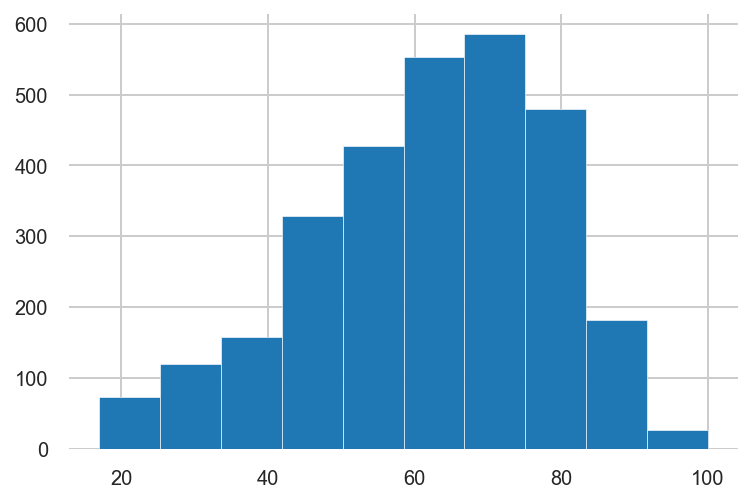

In [143]:
Age_list_sepsis.hist()

In [66]:
df_sepsis.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
count,160238.000000,156621.000000,60914.000000,148574.000000,157567.000000,128858.000000,150149.000000,18114.000000,15309.000000,9926.000000,...,11290.00000,172410.000000,172410.000000,87460.000000,87460.000000,172410.000000,172410.000000,172410.000000,172410.000000,172410.000000
mean,88.093556,97.300656,37.105103,124.175037,81.941918,62.744197,19.802851,32.807883,-0.308312,23.937971,...,186.86136,62.263144,0.589409,0.522948,0.477052,-80.538132,60.328496,0.161916,18154.756366,58.675912
std,18.504632,3.012365,0.903196,24.354515,16.210614,13.725244,5.870755,7.516207,4.512128,4.720720,...,113.71067,16.166759,0.491943,0.499476,0.499476,223.099570,56.553072,0.368375,11517.984004,56.449369
min,20.000000,20.000000,26.670000,22.000000,20.000000,21.000000,1.000000,10.000000,-23.000000,5.000000,...,2.00000,17.000000,0.000000,0.000000,0.000000,-3141.550000,1.000000,0.000000,6.000000,0.000000
25%,75.000000,96.000000,36.560000,106.000000,70.670000,53.000000,16.000000,28.000000,-3.000000,21.000000,...,105.00000,52.350000,0.000000,0.000000,0.000000,-68.550000,17.000000,0.000000,8471.000000,16.000000
50%,87.000000,98.000000,37.110000,122.000000,80.000000,61.000000,19.000000,33.000000,0.000000,24.000000,...,168.00000,64.940000,1.000000,1.000000,0.000000,-3.370000,43.000000,0.000000,16458.000000,41.000000
75%,100.000000,100.000000,37.700000,140.000000,92.000000,71.000000,23.000000,37.000000,2.000000,27.000000,...,241.00000,74.000000,1.000000,1.000000,1.000000,-0.030000,86.000000,0.000000,28130.000000,85.000000
max,223.000000,100.000000,41.400000,299.000000,298.000000,292.000000,100.000000,100.000000,21.000000,45.000000,...,1081.00000,100.000000,1.000000,1.000000,1.000000,16.020000,336.000000,1.000000,40323.000000,335.000000


### 3.4 Select the patients with no sepsis all the time

In [22]:
df_no_sepsis = df[~df['Patient_id'].isin(patient_id_sepsis)]
df_no_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,73.0,96.0,NaN,119.00,75.0,51.00,23.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,17,0,40335,16
1552206,76.0,96.0,36.90,138.00,88.0,61.00,21.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,18,0,40335,17
1552207,76.0,96.0,NaN,135.50,88.0,61.00,21.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,19,0,40335,18
1552208,69.0,96.0,NaN,122.50,77.5,51.50,20.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,20,0,40335,19


In [23]:
len(df_no_sepsis['Patient_id'].unique())

37404

### 3.4.1 get the number of female and male without sepsis.

In [155]:
Number_of_Female_without_sepsis = len(df_no_sepsis[df_no_sepsis['Gender']==0]['Patient_id'].unique())
Number_of_Female_without_sepsis

16577

In [156]:
Number_of_Male_without_sepsis = len(df_no_sepsis['Patient_id'].unique())- Number_of_Female_without_sepsis
Number_of_Male_without_sepsis

20827

In [158]:
Male_Female_without_sepsis_ratio = Number_of_Male_without_sepsis/Number_of_Female_without_sepsis
Male_Female_without_sepsis_ratio

1.2563793207456113

### In the without sepsis group, the ratio of male to female is 1.256.

### 3.4.2 The average age for the patient without sepsis  is 77.27.

In [124]:
patient_id_without_sepsis = df[df['SepsisLabel']==0]['Patient_id'].unique()

In [125]:
len(patient_id_without_sepsis)

39910

In [128]:
Age_list_without_sepsis = df_no_sepsis[df_no_sepsis['Patient_id'].isin(patient_id_without_sepsis)][df_no_sepsis['time']==0]['Age']
Age_list_without_sepsis.mean

<bound method Series.mean of 0          77.27
55         65.55
99         52.16
134        24.35
167        82.51
           ...  
1552023    69.00
1552039    88.00
1552073    77.00
1552130    77.00
1552189    67.00
Name: Age, Length: 37404, dtype: float64>

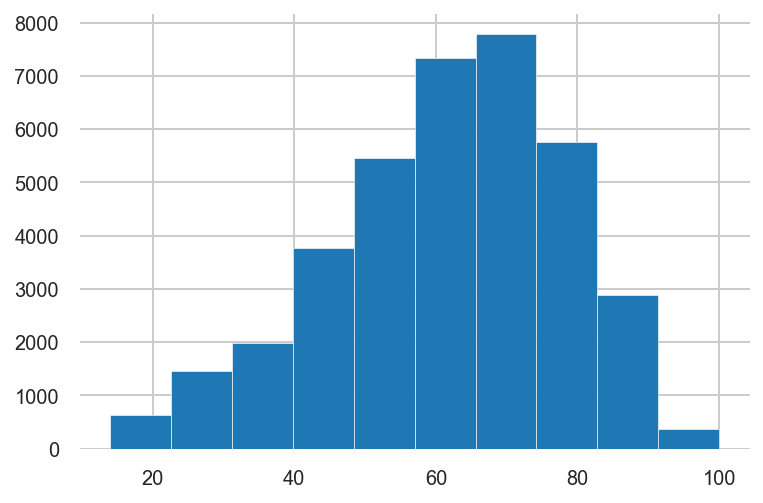

In [130]:
Age_list_without_sepsis.hist()

### 3.5.1 Compare the age distribution between the patients with and without sepsis

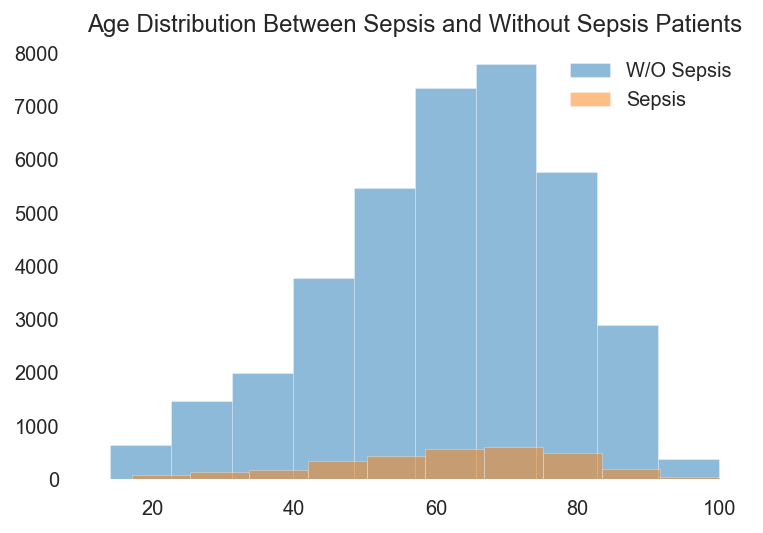

In [146]:
plt.hist(Age_list_without_sepsis, alpha=0.5, label='W/O Sepsis')
plt.hist(Age_list_sepsis, alpha=0.5, label='Sepsis')
plt.legend(loc='upper right')
plt.title("Age Distribution Between Sepsis and Without Sepsis Patients")
plt.show()

### According the graph showed above, the age is not a critical feature, althought the average age for sepsis is 66, and the average age for without sepsis group is  77, but it only show the icu has more old patients.

### 3.5.2 Compare the male/female ratio between the patients with and without sepsis

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



<BarContainer object of 2 artists>

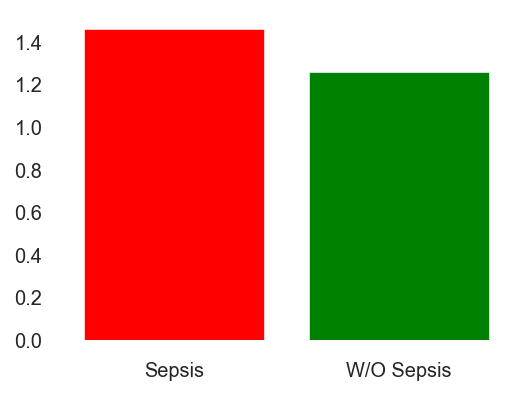

In [167]:
plt.figure(figsize=(4, 3))
plt.bar(["Sepsis", "W/O Sepsis"],[Male_Female_in_sepsis_ratio, Male_Female_without_sepsis_ratio], color='rgb')

## 3.6 Select the patients developed sepsis from "0" to "1"

In [24]:
patient_id_sepsis_develop = df_sepsis[df_sepsis['SepsisLabel'] == 0]['Patient_id'].unique()

In [25]:
len(patient_id_sepsis_develop)

2506

In [26]:
df_sepsis_develop = df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis_develop)]

In [64]:
df_sepsis_develop

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
238,110.0,100.0,35.9,110.0,83.0,70.0,14.0,NaN,-4.0,20.0,...,NaN,66.36,1,0.0,1.0,-162.76,6,0,6,0
239,110.0,100.0,36.2,118.0,90.0,76.0,14.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,7,0,6,1
240,102.0,100.0,36.5,100.0,76.0,63.0,14.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,8,0,6,2
241,101.0,100.0,36.1,121.0,87.0,71.0,15.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,9,0,6,3
242,100.0,100.0,36.0,129.0,90.0,72.0,16.0,NaN,NaN,21.0,...,105.0,66.36,1,0.0,1.0,-162.76,10,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551453,100.0,94.0,35.7,86.0,60.0,50.0,25.5,19.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,25,1,40321,22
1551454,92.0,96.0,35.7,148.0,96.0,76.0,25.0,25.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,26,1,40321,23
1551455,102.0,98.0,36.0,140.0,92.0,70.0,25.0,25.0,NaN,NaN,...,46.0,52.00,1,0.0,1.0,-29.08,27,1,40321,24
1551456,88.0,99.0,36.0,148.0,102.0,74.0,25.0,24.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,28,1,40321,25


In [123]:
df_sepsis_develop[43:58]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
281,103.0,96.0,36.78,137.0,92.0,70.0,23.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,49,0,6,43
282,112.0,100.0,NaN,138.0,90.0,69.0,25.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,50,0,6,44
283,111.0,97.0,NaN,140.0,91.0,69.0,27.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,51,1,6,45
284,112.0,95.0,NaN,129.0,86.0,65.0,29.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,52,1,6,46
285,109.0,100.0,NaN,127.0,84.0,62.0,29.0,NaN,NaN,NaN,...,106.0,66.36,1,0.0,1.0,-162.76,53,1,6,47
286,99.0,96.0,36.61,140.0,95.0,71.0,28.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,54,1,6,48
287,112.0,97.0,NaN,134.0,90.0,67.0,24.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,55,1,6,49
288,105.0,100.0,NaN,142.0,96.0,72.0,25.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,56,1,6,50
289,117.0,95.0,NaN,126.0,83.0,62.0,24.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,57,1,6,51
290,114.0,94.0,36.83,144.0,96.0,71.0,26.0,NaN,0.0,23.0,...,103.0,66.36,1,0.0,1.0,-162.76,58,1,6,52


In [121]:
df_sepsis_develop[185:200]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2552,80.0,94.0,NaN,109.0,73.0,58.0,27.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,132,0,71,131
2553,80.0,95.0,36.33,120.0,85.0,70.0,28.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,133,0,71,132
2554,79.0,96.0,NaN,123.0,86.0,70.0,28.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,134,0,71,133
2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,135,0,71,134
2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,136,1,71,135
2557,85.5,95.0,36.83,128.0,87.5,71.5,22.0,NaN,NaN,25.0,...,NaN,45.98,1,NaN,NaN,-219.74,137,1,71,136
2558,87.0,94.0,NaN,126.0,85.0,69.0,28.0,NaN,0.0,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,138,1,71,137
2559,86.0,96.0,NaN,130.0,86.0,68.0,24.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,139,1,71,138
2560,90.0,94.0,NaN,150.0,102.0,83.0,30.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,140,1,71,139
2561,92.0,98.0,36.61,154.0,104.0,85.0,33.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,141,1,71,140


In [27]:
df_sepsis_develop.shape

(168764, 43)

### select 5 time points (5 hours) before and after sepsis happen.

In [50]:
df_count_0 = df_sepsis_develop.groupby(['Patient_id', 'SepsisLabel'])['time'].count().unstack().reset_index()
df_count_0

SepsisLabel,Patient_id,0,1
0,6,45,9
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
...,...,...,...
2501,40242,38,10
2502,40261,88,2
2503,40280,25,10
2504,40292,70,10


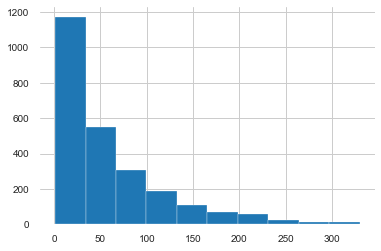

In [37]:
df_count_0[0].hist()

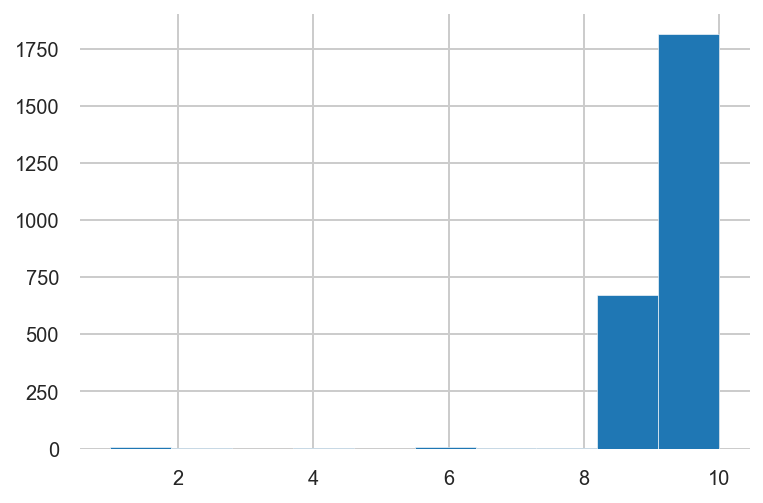

In [92]:
df_count_0[1].hist()

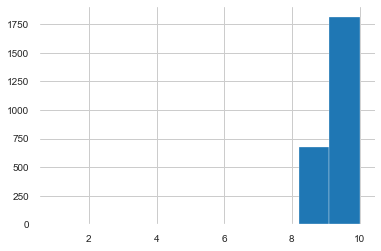

In [38]:
df_count_0[1].hist()

### 3.6.1 Select patients have 5 time point (5 hours) before and after sepsis. 

In [46]:
patients_less_5 = df_count_0[(df_count_0[0] < 5) | (df_count_0[1] < 5)]['Patient_id'].to_list()

In [47]:
len(patients_less_5)

252

In [53]:
df_count_0_more_than_5 = df_count_0[~df_count_0['Patient_id'].isin(patients_less_5)]
df_count_0_more_than_5

SepsisLabel,Patient_id,0,1
0,6,45,9
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
...,...,...,...
2500,40235,14,10
2501,40242,38,10
2503,40280,25,10
2504,40292,70,10


### create new dataframe having 5 time point before and after sepsis

In [72]:
df_sepsis_develop_5 = pd.DataFrame(columns=df_sepsis_develop.columns)

In [55]:
df_sepsis_develop[df_sepsis_develop['Patient_id']==6].index.values.astype(int)

array([238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291])

In [63]:
df_sepsis_develop[df_sepsis_develop['Patient_id']==6].index.values

array([238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291])

In [79]:
for id in df_count_0_more_than_5['Patient_id'].to_list():
    start_index = df_sepsis_develop[df_sepsis_develop['Patient_id']==id].index.values.astype(int)[0]
    start_index_5 = int(start_index) + int(df_count_0_more_than_5[df_count_0_more_than_5['Patient_id']==id][0]) - 5
    new_rows = df_sepsis_develop.loc[start_index_5:start_index_5+9]
    df_sepsis_develop_5=df_sepsis_develop_5.append(new_rows)

In [81]:
df_sepsis_develop_5.head(20)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
278,93.0,96.0,NaN,146.0,95.0,72.0,18.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,46,0,6,40
279,97.0,100.0,NaN,154.0,102.0,78.0,20.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,47,0,6,41
280,90.0,99.0,NaN,134.0,91.0,71.0,21.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,48,0,6,42
281,103.0,96.0,36.78,137.0,92.0,70.0,23.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,49,0,6,43
282,112.0,100.0,NaN,138.0,90.0,69.0,25.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,50,0,6,44
283,111.0,97.0,NaN,140.0,91.0,69.0,27.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,51,1,6,45
284,112.0,95.0,NaN,129.0,86.0,65.0,29.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,52,1,6,46
285,109.0,100.0,NaN,127.0,84.0,62.0,29.0,NaN,NaN,NaN,...,106.0,66.36,1,0.0,1.0,-162.76,53,1,6,47
286,99.0,96.0,36.61,140.0,95.0,71.0,28.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,54,1,6,48
287,112.0,97.0,NaN,134.0,90.0,67.0,24.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,55,1,6,49


### 3.6.2 Check the feature difference 5 hours before and after sepsis happens

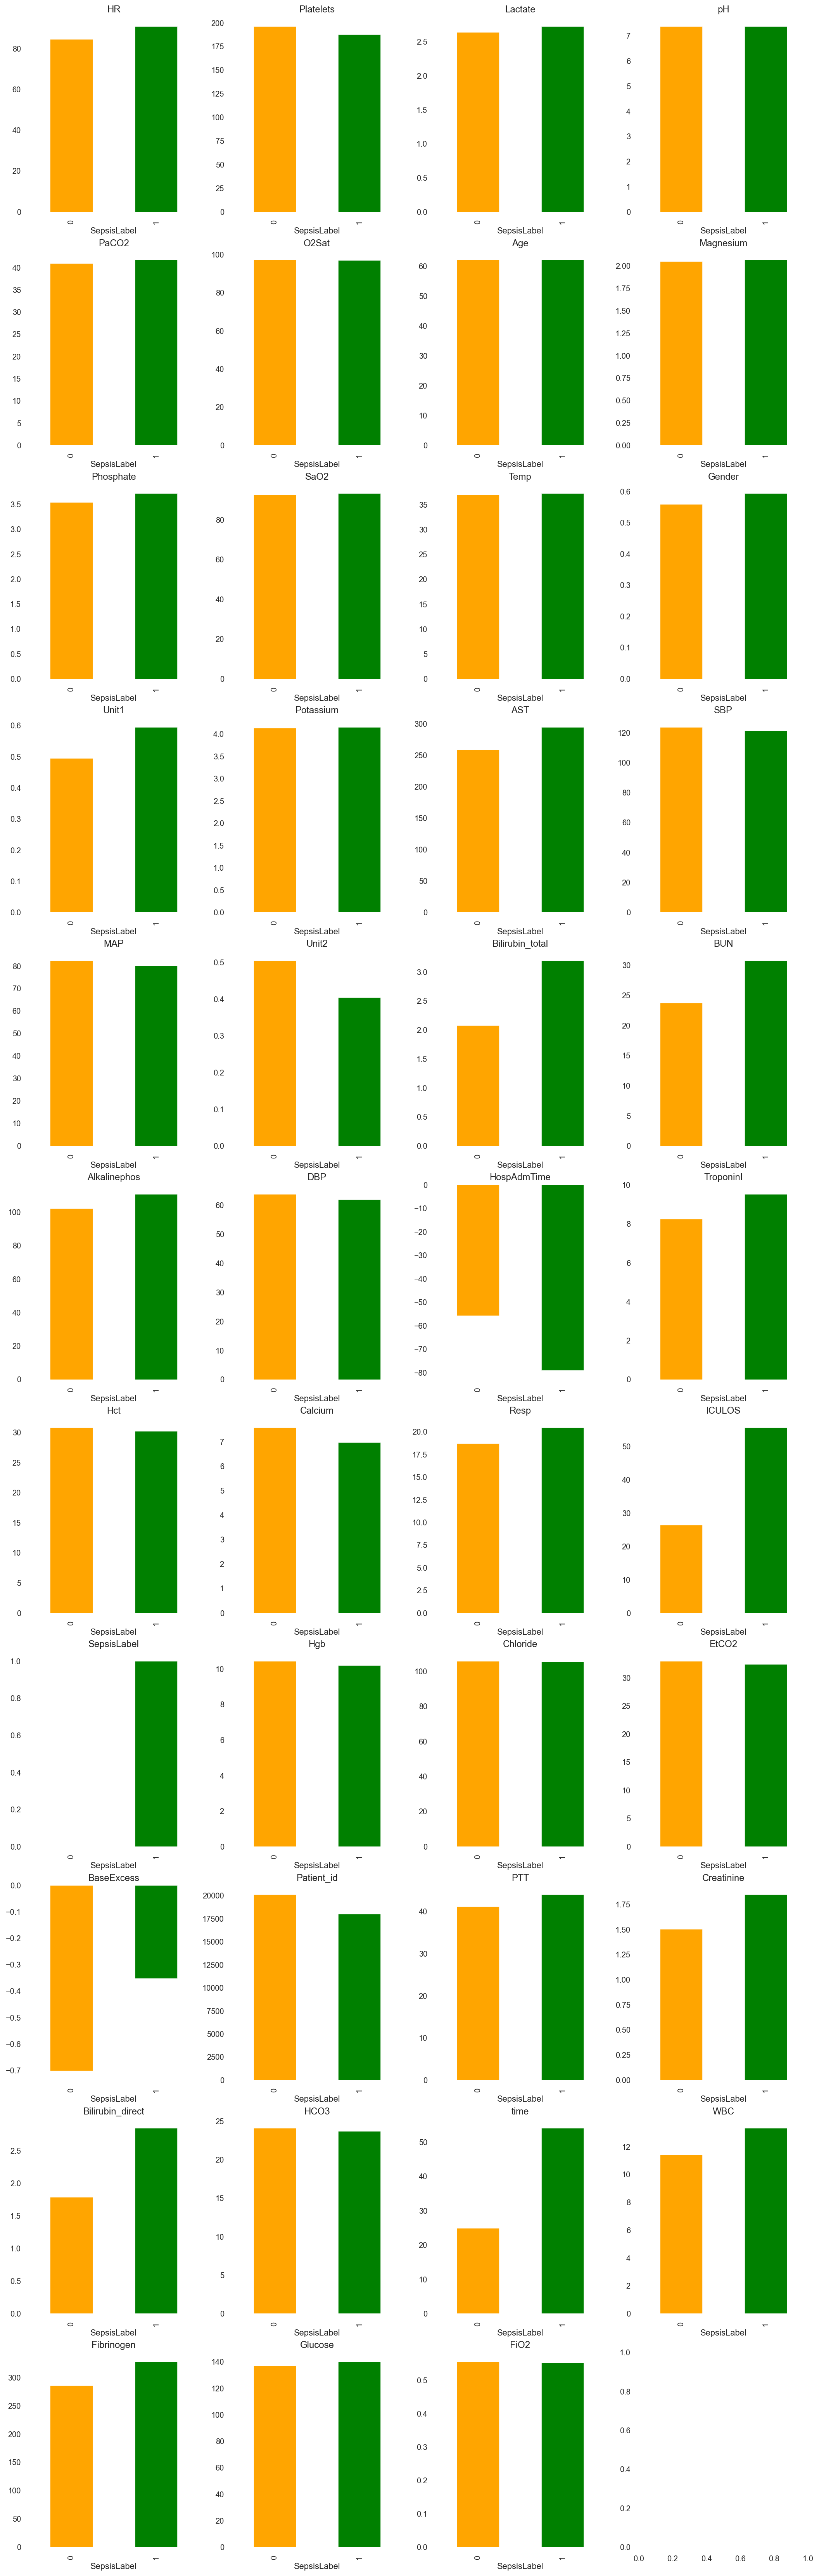

In [178]:
fig, axes = plt.subplots(11, 4, figsize=(18,60))
for index, column in enumerate(df_sepsis_develop_5.columns):
    df.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%11, index%4], color=['orange', 'green'])

### 3.6.3 Select the patients with the 10 time point (10 hours) before and 10 time points (10 hours) hours after the sepsis.

In [94]:
patients_less_10 = df_count_0[(df_count_0[0] < 10) | (df_count_0[1] < 10)]['Patient_id'].to_list()

In [95]:
len(patients_less_10)

1058

In [96]:
df_count_0_more_than_10 = df_count_0[~df_count_0['Patient_id'].isin(patients_less_10)]
df_count_0_more_than_10

SepsisLabel,Patient_id,0,1
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
6,166,23,10
...,...,...,...
2500,40235,14,10
2501,40242,38,10
2503,40280,25,10
2504,40292,70,10


In [103]:
df_sepsis_develop_10 = pd.DataFrame(columns=df_sepsis_develop.columns)

In [105]:
for id in tqdm(df_count_0_more_than_10['Patient_id'].to_list()):
    start_index = df_sepsis_develop[df_sepsis_develop['Patient_id']==id].index.values.astype(int)[0]
    start_index_10 = int(start_index) + int(df_count_0_more_than_10[df_count_0_more_than_10['Patient_id']==id][0]) - 10
    new_rows = df_sepsis_develop.loc[start_index_10:start_index_10+19]
    df_sepsis_develop_10=df_sepsis_develop_10.append(new_rows)

100%|██████████| 1448/1448 [02:21<00:00, 10.25it/s]


In [109]:
df_sepsis_develop_10.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2546,75.0,98.0,NaN,126.0,87.0,71.0,30.0,NaN,0.0,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,126,0,71,125
2547,77.0,96.0,NaN,127.0,89.0,71.0,28.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,127,0,71,126
2548,77.0,97.0,NaN,121.0,84.0,68.0,31.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,128,0,71,127
2549,77.0,95.0,36.17,125.0,86.0,70.0,25.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,129,0,71,128
2550,78.0,95.0,NaN,124.0,85.0,67.0,30.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,130,0,71,129


### 3.6.4 Check the feature difference 10 hours before and after sepsis happens

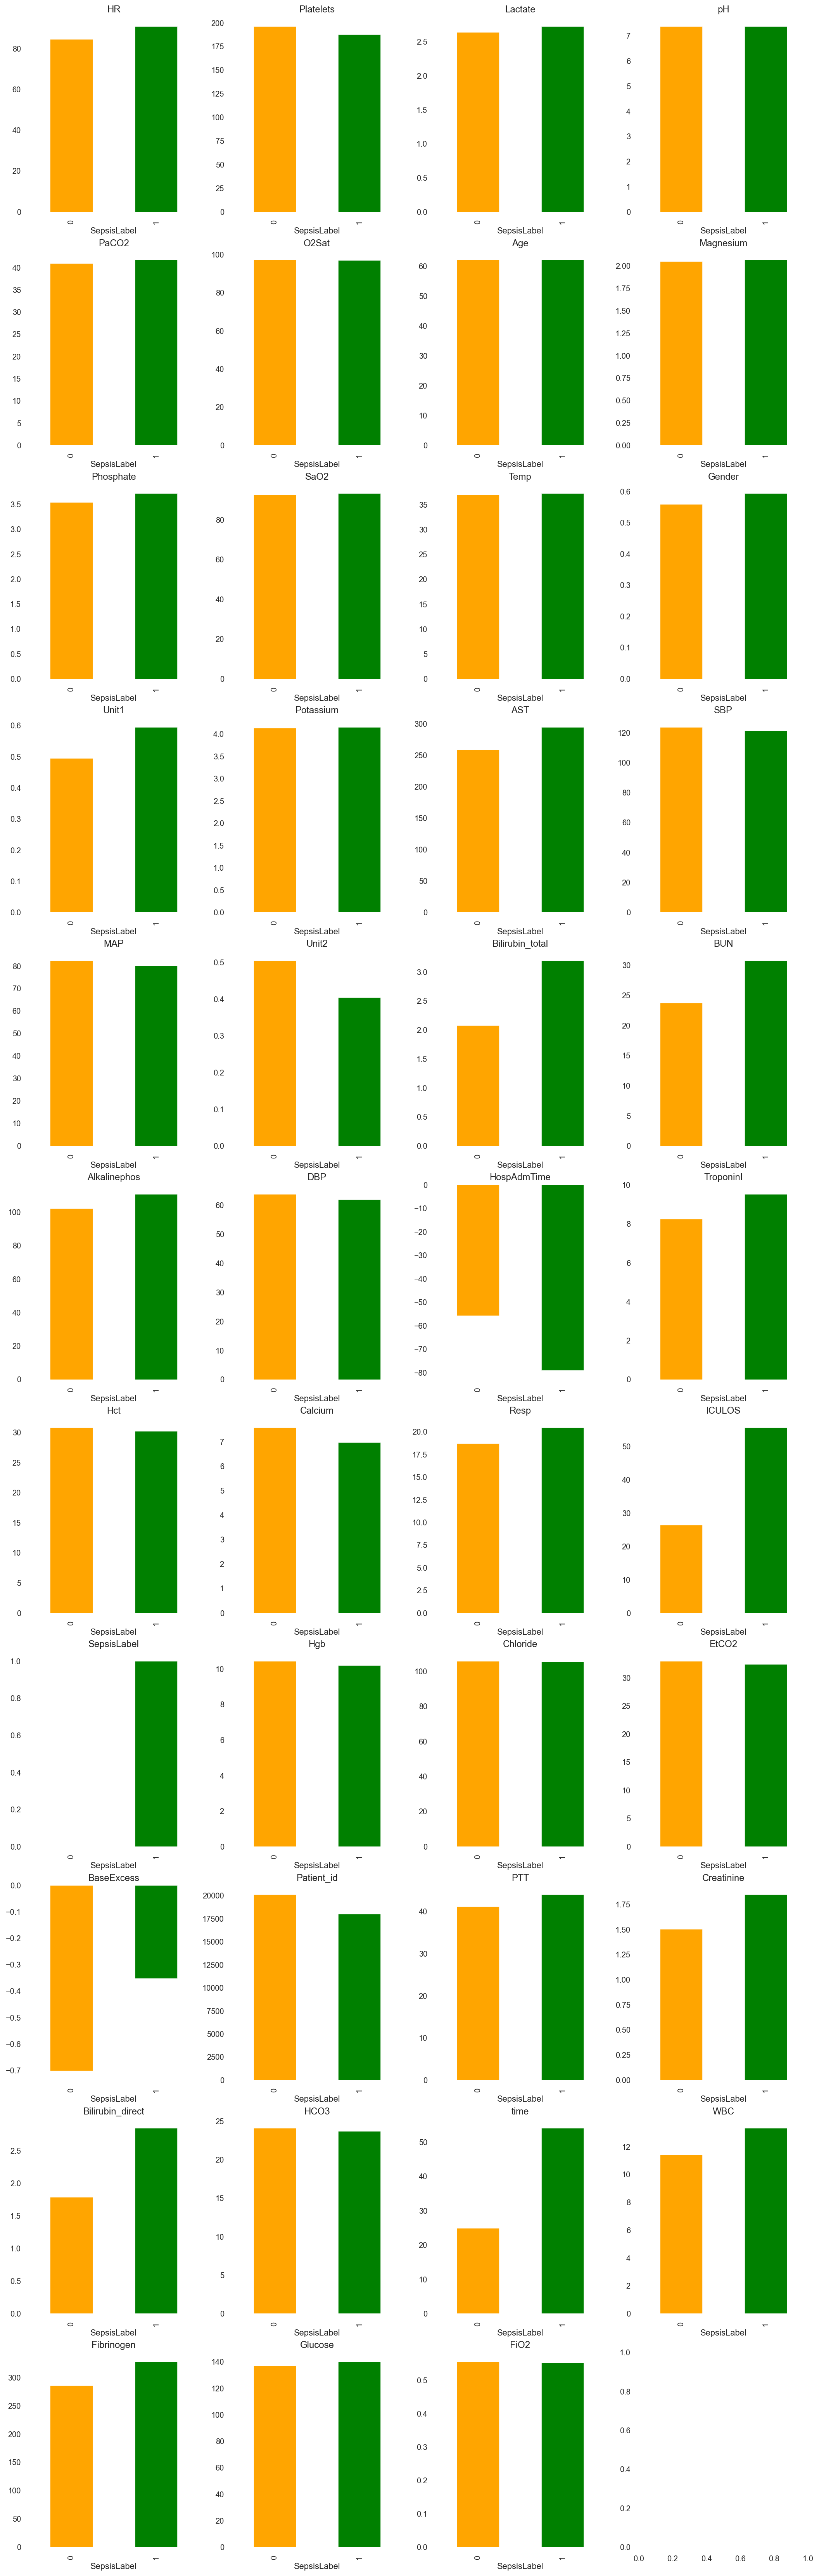

In [179]:
fig, axes = plt.subplots(11, 4, figsize=(18,60))
for index, column in enumerate(df_sepsis_develop_10.columns):
    df.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%11, index%4], color=['orange', 'green'])

## 4. Conclusion - By Comparing the feature difference between before and after 5 hours when sepsis happens and the feature difference between before and after 10 hours when sepsis happens, we can almost get same results, which mean 10 hours before the sepsis, the lab result and vital sign could tell us if sepsis will happen. We can use these features for early sepsis detection. 

### 1. Vital sign

  - 1.Heart rate (beats per minute) increase from average 80 to 90+.
  - 2.SBP Systolic BP (mm Hg) decrease a little bit. 
  - 3.MAP	Mean arterial pressure (mm Hg) decrease a little bit.
  - 4.DBP	Diastolic BP (mm Hg) decrease a little bit.
  - 5.Resp  Respiration rate (breaths per minute) increase from 18 to 22.
  - 6.EtCO2	End tidal carbon dioxide (mm Hg) decrease a little bit. 

### 2. Laboratory results

  - 1.BaseExcess	Measure of excess bicarbonate (mmol/L) increase from -0.7 to 0.35.
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290.
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.
  - 5.Calcium	(mg/dL)  decrease from 7.8 to 6.8.
  - 6.Creatinine	(mg/dL) increase from 1.5 to 1.8.
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0.
  - 8.Lactate	Lactic acid (mg/dL) increase a little bit from 40 to 45.
  - 9.Phosphate	(mg/dL) increase a little bit.
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.
  - 11.TroponinI	Troponin I (ng/mL) increase a little bit from average 8 to average 9.5.
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45.
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13.
  - 14.Fibrinogen	(mg/dL) increase a lot from 290 to 340.
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188.

### 3. Demographics   

  - 1.Gender	Female (0) or Male (1)  Male has more cases than women.
  - 2.Unit1	Administrative identifier for ICU unit (MICU: medical intensive care unit), has more tendecy to get sepsis, or sepsis has more ratio of the total MICU.  
  - 3.Unit2	Administrative identifier for ICU unit (SICU:surgical intensive care unit), has less case happen sepsis, or sepsis has less ratio of the total SICU.
  - 4.ICULOS	ICU length-of-stay (hours since ICU admit) increase a lot, which is twice as sepsis as the non sepsis.

### Other analysis undergoing

In [76]:
Number_of_Female_in_sepsis_develop = len(df_sepsis_develop[df_sepsis_develop['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_sepsis_develop

1018

In [77]:
Number_of_Male_in_sepsis_develop = len(patient_id_sepsis_develop) - Number_of_Female_in_sepsis_develop
Number_of_Male_in_sepsis_develop

1488

In [78]:
Male_Female_in_sepsis_develop_ratio = Number_of_Male_in_sepsis_develop/Number_of_Female_in_sepsis_develop
Male_Female_in_sepsis_develop_ratio

1.461689587426326

In [109]:
# Get the dataframe with the people without developing to sepsis.
df_sepsis_no_develop_unique = df_sepsis[df_sepsis['time']==0][df_sepsis['SepsisLabel']==1]
patient_id_sepsis_no_develop = df_sepsis_no_develop_unique['Patient_id'].unique()

In [113]:
df_sepsis_no_develop =  df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis_no_develop)]
df_sepsis_no_develop

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,1,1,58,0
2056,115.0,93.0,36.72,89.0,71.0,61.0,14.0,NaN,-12.0,11.0,...,NaN,60.42,1,1.0,0.0,-25.95,2,1,58,1
2057,106.0,96.0,NaN,99.0,NaN,57.0,30.0,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,3,1,58,2
2058,106.0,92.0,NaN,89.0,65.0,53.0,23.0,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,4,1,58,3
2059,113.0,89.0,NaN,95.0,60.5,55.0,NaN,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,5,1,58,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551484,87.5,100.0,37.35,146.0,101.5,72.5,14.5,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,6,1,40323,5
1551485,74.0,100.0,37.20,140.0,98.0,69.0,14.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,7,1,40323,6
1551486,85.0,97.0,NaN,147.0,100.0,70.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,8,1,40323,7
1551487,78.0,99.0,NaN,157.0,110.0,77.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,9,1,40323,8


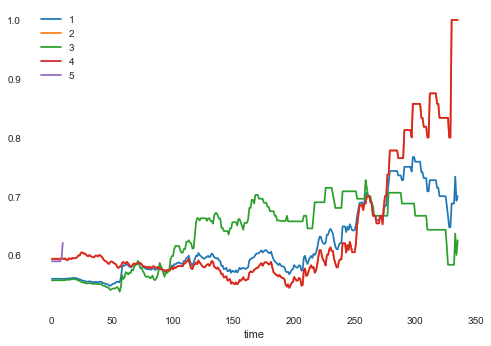

In [114]:
# Unfinished part. 
fig, ax = plt.subplots()
DF_sepsis_develop.groupby('time')['Gender'].mean().plot(label="2")
df_sepsis_develop.groupby('time')['Gender'].mean().plot(label="2")
df_no_sepsis.groupby('time')['Gender'].mean().plot(label="3")
df_sepsis.groupby('time')['Gender'].mean().plot(label="4")
df_sepsis_no_develop.groupby('time')['Gender'].mean().plot(label="5")
ax.legend()